In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split,KFold,cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.datasets import california_housing

from scipy import stats
import statsmodels.api as sm


In [193]:
df = pd.read_csv('kc_house_data.csv')

In [194]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [196]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [197]:
df['waterfront'].unique()

array([nan,  0.,  1.])

In [198]:
df['waterfront'] = df['waterfront'].fillna(0.0)

In [199]:
df['waterfront'].isna().sum()

0

In [200]:
#view tells us whether a property has been viewed or not. 
df.drop(columns='view', inplace=True)

In [201]:
#Check new column list
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [202]:
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [203]:
df['yr_renovated'].isna().sum()

3842

In [204]:
df['yr_renovated'] = df['yr_renovated'].fillna(0.0)

In [205]:
df['date'].min()

'1/10/2015'

In [206]:
df.loc[(df['yr_renovated']>=2000), 'renovate_15'] = 1
df.loc[(df['yr_renovated']<2000), 'renovate_15'] = 0

In [207]:
df['renovate_15'].unique()

array([0., 1.])

In [208]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [209]:
#outlier at bedroom = 33 should be removed as it is far higher than rest of set
df = df[df['bedrooms']!=33]

In [210]:
#check outlier removed
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10])

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
id               21596 non-null int64
date             21596 non-null object
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       21596 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null object
yr_built         21596 non-null int64
yr_renovated     21596 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
renovate_15      21596 non-null float64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


In [212]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
530.0       103
450.0       103
480.0       103
720.0        98
620.0        90
580.0        83
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
550.0        76
780.0        76
650.0        75
240.0        74
380.0        73
680.0        73
850.0        72
          ...  
2610.0        1
225.0         1
516.0         1
2390.0        1
266.0         1
784.0         1
2580.0        1
2190.0        1
792.0         1
861.0         1
2240.0        1
3000.0        1
374.0         1
2120.0        1
243.0         1
2570.0        1
1798.0        1
2490.0        1
295.0         1
506.0         1
2250.0        1
2350.0        1
274.0         1
1135.0        1
2500.0        1
2196.0        1
915.0         1
652.0         1
1548.0        1
1281.0        1
Name: sqft_basement, Len

In [213]:
#sqft basement needs to be converted to int64 and '?' removed
df['sqft_basement'].replace(to_replace = '?', value = '0.0', inplace=True)

In [214]:
df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
450.0       103
530.0       103
480.0       103
720.0        98
620.0        90
580.0        83
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
780.0        76
550.0        76
650.0        75
240.0        74
680.0        73
380.0        73
360.0        72
850.0        72
          ...  
2610.0        1
225.0         1
516.0         1
2390.0        1
266.0         1
784.0         1
2580.0        1
2190.0        1
792.0         1
861.0         1
2240.0        1
3000.0        1
374.0         1
2120.0        1
243.0         1
2570.0        1
1798.0        1
2490.0        1
295.0         1
506.0         1
2250.0        1
2350.0        1
274.0         1
1135.0        1
2500.0        1
2196.0        1
915.0         1
652.0         1
1548.0        1
1281.0        1
Name: sqft_basement, Len

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
id               21596 non-null int64
date             21596 non-null object
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       21596 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null object
yr_built         21596 non-null int64
yr_renovated     21596 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
renovate_15      21596 non-null float64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


In [216]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
id               21596 non-null int64
date             21596 non-null object
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       21596 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null float64
yr_built         21596 non-null int64
yr_renovated     21596 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
renovate_15      21596 non-null float64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.6+ MB


In [218]:
#option to make basement a binary option 1 = propert has basement, 0 = no basement

In the following two cells we set up our data split for furture train and test methods

In [220]:
#df, df_test, target, target_test = train_test_split(df, target, test_size=0.2, random_state=42)

In [221]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovate_15
id,1.000000,-0.016763,0.002328,0.005145,-0.012258,-0.131920,0.018576,-0.003602,-0.023721,0.008169,-0.010831,-0.004336,0.021589,-0.010619,-0.008195,-0.001766,0.020643,-0.002734,-0.138570,-0.008119
price,-0.016763,1.000000,0.315961,0.525915,0.701929,0.089879,0.256820,0.264308,0.036031,0.667964,0.605392,0.321103,0.053965,0.117858,-0.053409,0.306687,0.022047,0.585267,0.082849,0.106006
bedrooms,0.002328,0.315961,1.000000,0.527870,0.593178,0.033602,0.183707,-0.002054,0.023440,0.366174,0.492543,0.303517,0.160736,0.018626,-0.158588,-0.011595,0.136561,0.404532,0.031892,0.033965
bathrooms,0.005145,0.525915,0.527870,1.000000,0.755755,0.088368,0.502574,0.063628,-0.126443,0.665834,0.686664,0.278504,0.507166,0.047173,-0.204778,0.024301,0.224889,0.569878,0.088297,0.063788
sqft_living,-0.012258,0.701929,0.593178,0.755755,1.000000,0.173449,0.353941,0.104635,-0.059397,0.762776,0.876448,0.428683,0.318140,0.051056,-0.199793,0.052178,0.241200,0.756400,0.184337,0.051032
sqft_lot,-0.131920,0.089879,0.033602,0.088368,0.173449,1.000000,-0.004824,0.021458,-0.008806,0.114726,0.184134,0.015038,0.052939,0.004977,-0.129582,-0.085507,0.230222,0.144756,0.718203,-0.013416
floors,0.018576,0.256820,0.183707,0.502574,0.353941,-0.004824,1.000000,0.020794,-0.264013,0.458783,0.523970,-0.241845,0.489175,0.003785,-0.059522,0.049280,0.125912,0.280072,-0.010734,0.004070
waterfront,-0.003602,0.264308,-0.002054,0.063628,0.104635,0.021458,0.020794,1.000000,0.016659,0.082817,0.071776,0.083053,-0.024491,0.073938,0.028925,-0.012154,-0.037632,0.083822,0.030657,0.014794
condition,-0.023721,0.036031,0.023440,-0.126443,-0.059397,-0.008806,-0.264013,0.016659,1.000000,-0.146854,-0.158826,0.168431,-0.361555,-0.055795,0.002835,-0.015209,-0.105800,-0.092979,-0.003093,-0.072809
grade,0.008169,0.667964,0.366174,0.665834,0.762776,0.114726,0.458783,0.082817,-0.146854,1.000000,0.756069,0.165863,0.447854,0.015618,-0.185761,0.113602,0.200324,0.713863,0.120974,0.035661


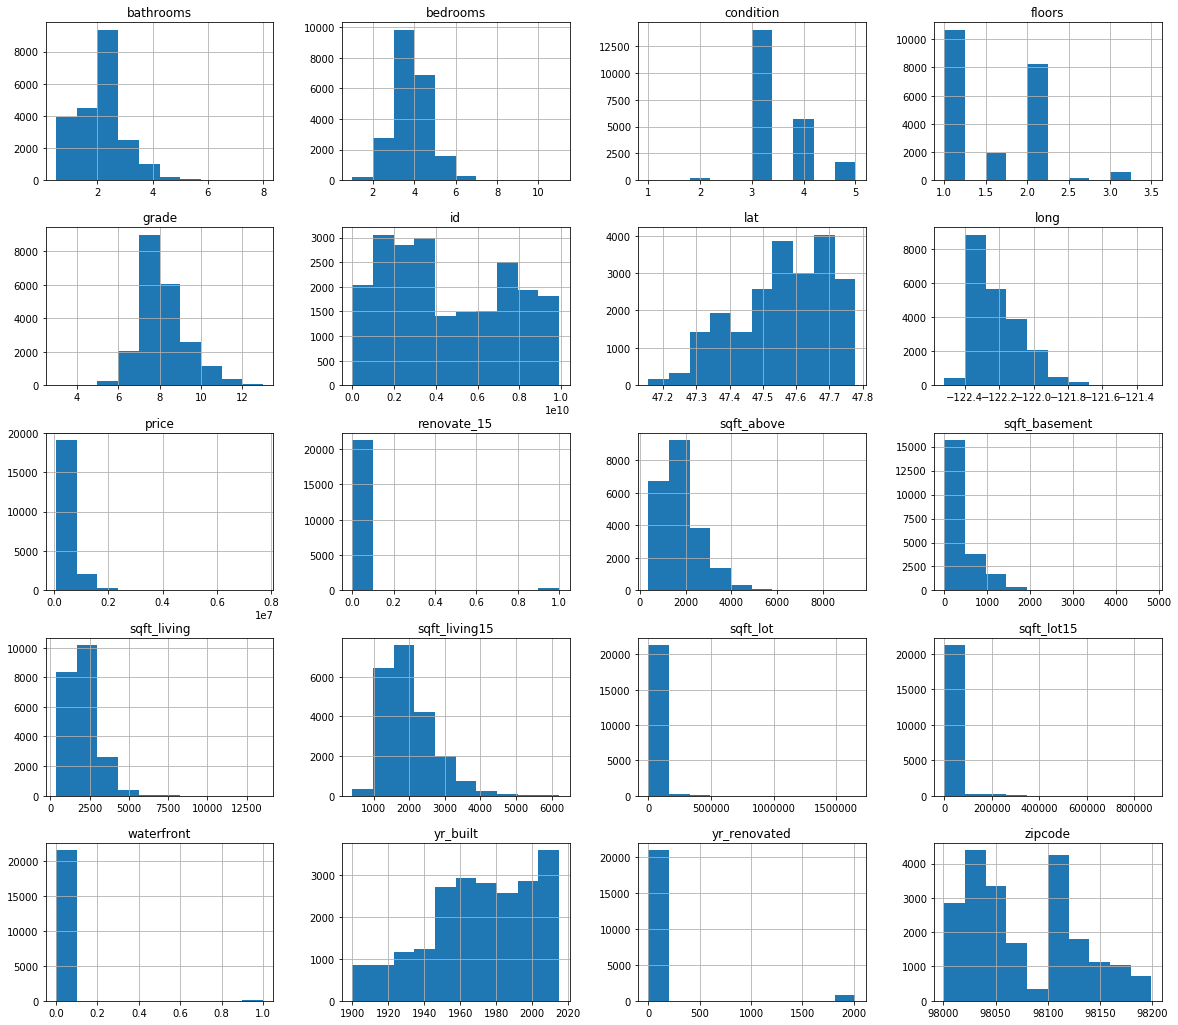

In [222]:
df.hist(figsize=(20,18));

In [223]:
import warnings
warnings.filterwarnings('ignore')

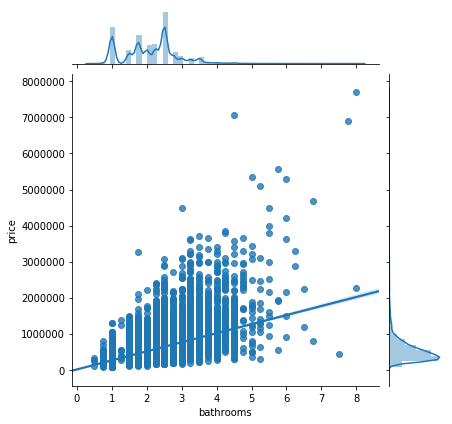

In [224]:
sns.jointplot('bathrooms', 'price', data=df, kind='reg');
#There is evidence of a linear relationship between number of bathrooms and price. 

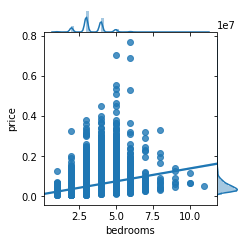

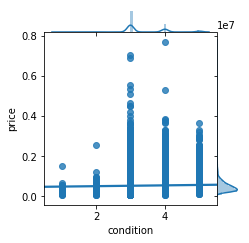

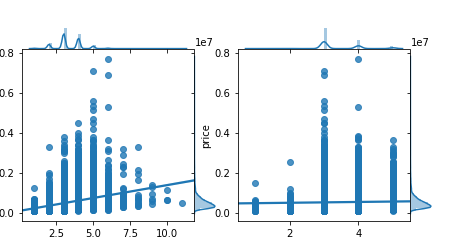

In [225]:
bedplt = sns.jointplot('bedrooms', 'price', data=df, kind='reg');
conplt = sns.jointplot('condition', 'price', data=df, kind='reg');

f = plt.figure()
for j in [bedplt, conplt]:
    for i in j.fig.axes:
        f._axstack.add(f._make_key(i), i)

f.axes[0].set_position([0.05, 0.05, 0.4,  0.4])
f.axes[1].set_position([0.05, 0.45, 0.4,  0.05])
f.axes[2].set_position([0.45, 0.05, 0.05, 0.4])
f.axes[3].set_position([0.55, 0.05, 0.4,  0.4])
f.axes[4].set_position([0.55, 0.45, 0.4,  0.05])
f.axes[5].set_position([0.95, 0.05, 0.05, 0.4])

In [226]:
#An attempt to save some time on the joint plots by plotting on separate axes.
#evidence of a linear relationship between number of bedrooms and price
#evidence of no linear relationship between condition and price

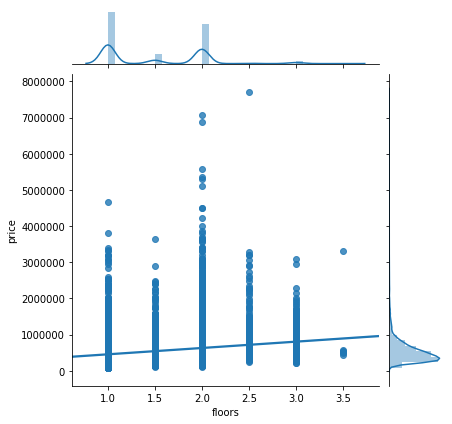

In [227]:
sns.jointplot('floors', 'price', data=df, kind='reg');

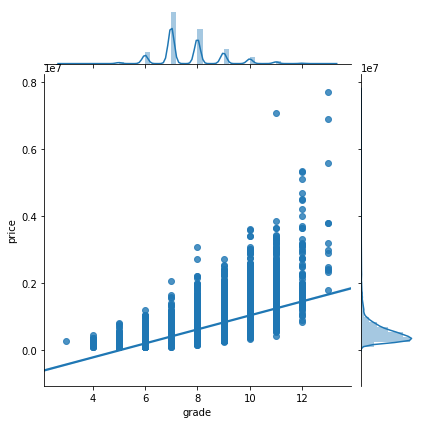

In [228]:
sns.jointplot('grade', 'price', data=df, kind='reg');

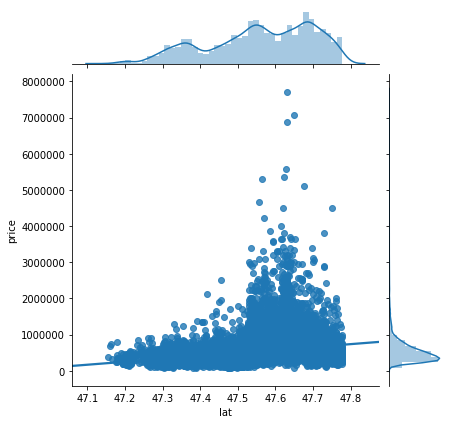

In [229]:
sns.jointplot('lat', 'price', data=df, kind='reg');

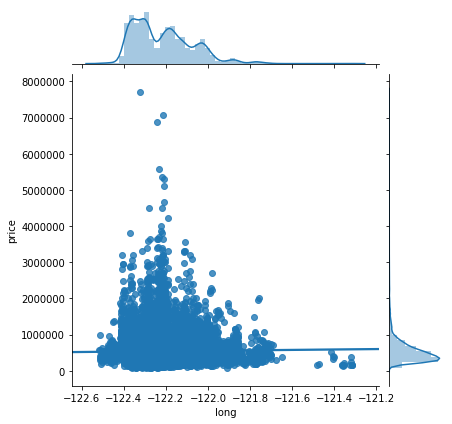

In [230]:
sns.jointplot('long', 'price', data=df, kind='reg');

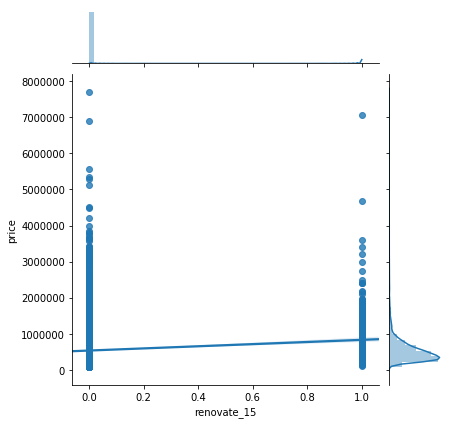

In [231]:
sns.jointplot('renovate_15', 'price', data=df, kind='reg');

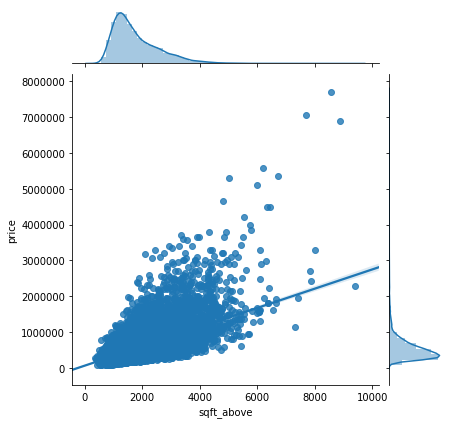

In [232]:
sns.jointplot('sqft_above', 'price', data=df, kind='reg');

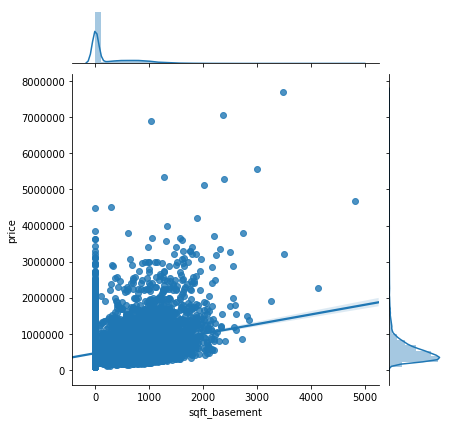

In [233]:
sns.jointplot('sqft_basement', 'price', data=df, kind='reg');

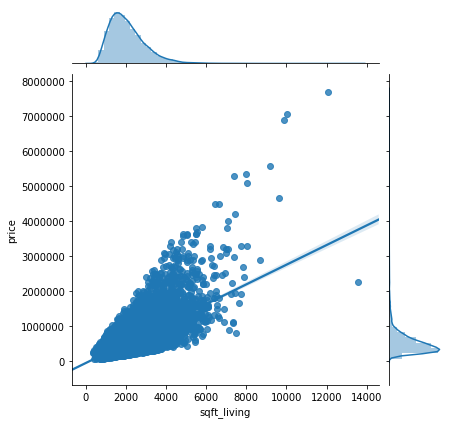

In [234]:
sns.jointplot('sqft_living', 'price', data=df, kind='reg');

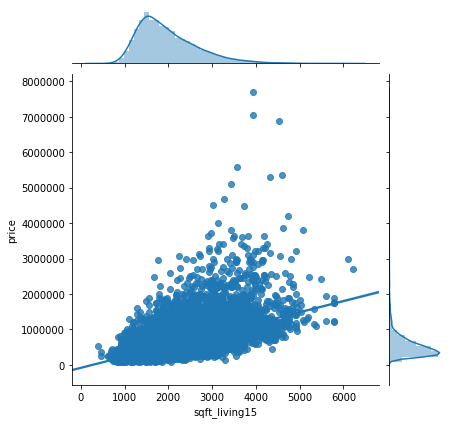

In [235]:
sns.jointplot('sqft_living15', 'price', data=df, kind='reg');

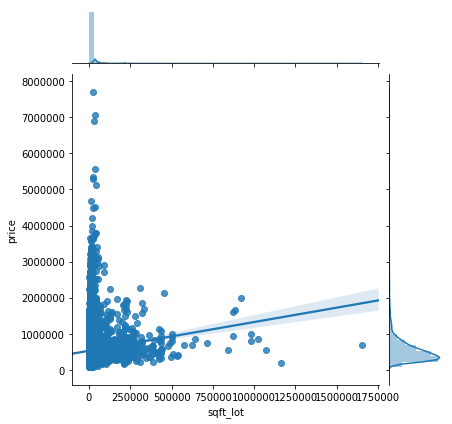

In [236]:
sns.jointplot('sqft_lot', 'price', data=df, kind='reg');

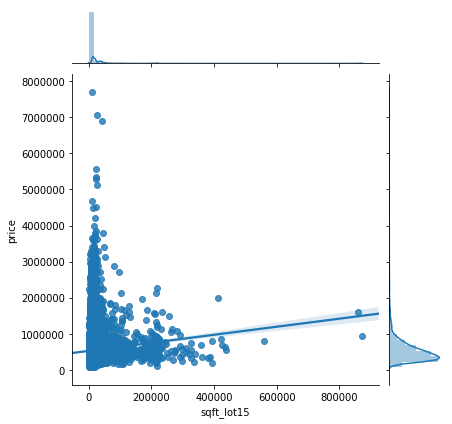

In [237]:
sns.jointplot('sqft_lot15', 'price', data=df, kind='reg');

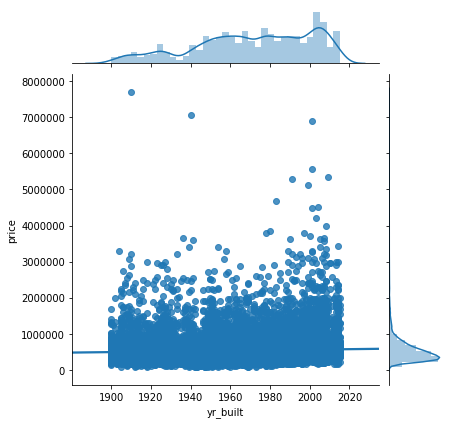

In [238]:
sns.jointplot('yr_built', 'price', data=df, kind='reg');

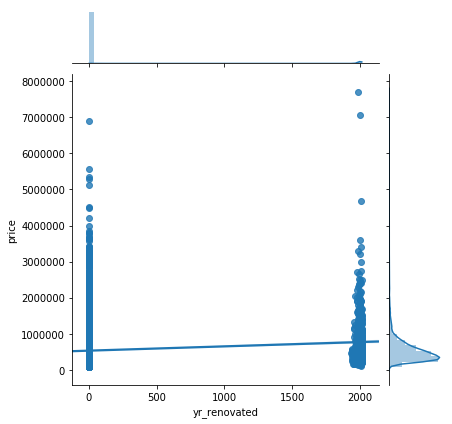

In [239]:
sns.jointplot('yr_renovated', 'price', data=df, kind='reg');

In [117]:
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovate_15
0,7129300520,10/13/2014,221900.0,3,1.0,1180,5650,1.0,0.0,3,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0


In [120]:
#lets check for multicollinearity between our predictors that are showing some signs of linear relationship

In [127]:
feat = ['bathrooms', 'bedrooms', 'grade', 'sqft_above', 'sqft_basement', 
              'sqft_living', 'sqft_living15', 'sqft_lot15']
corr_df = df[feat].corr()

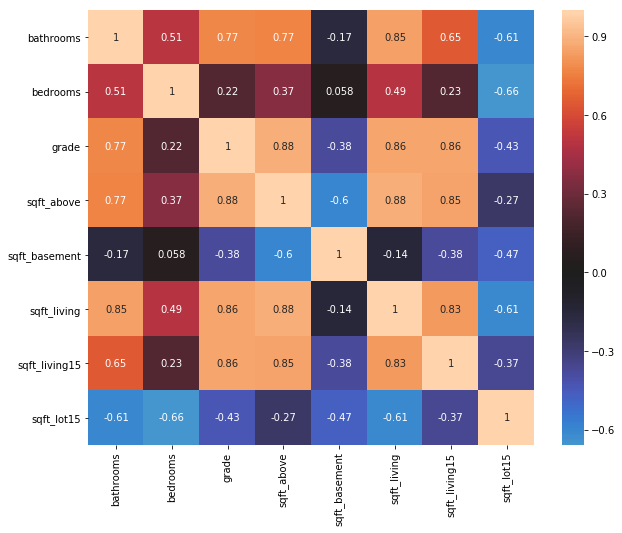

In [134]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr_df.corr(), center=0, annot=True);

In [133]:
# The most worring correlations that this heatmap identifies are between: 
# 1. bathrooms and grade, sqft_above, sqft_living
# 2. grade and sqft_above, sqft_living and sqft_living15
# 3. sqft_above and sqft_living, sqft_living15
# 4. sqft_living and sqft_living15

# I don't understand how condition is no predictor of price?

In [135]:
# The question we'd like to ask is what advice would we give to homeowners who want to know if it's worth making some
#changes or upgrades to their house

In [138]:
#Let's choose some simple predictors that have low multicollinearity
#1.bathrooms, bedrooms, sqft_living15
#2.bedrooms, sqft_living, sqft_basement

In [148]:
data = df[['price','bathrooms', 'bedrooms', 'grade', 'sqft_above', 'sqft_basement', 
              'sqft_living', 'sqft_living15', 'sqft_lot15']]
data.head()

,price,bathrooms,bedrooms,grade,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot15
0,221900.0,-1.451035,-0.411263,-0.560804,-0.735272,-0.649583,-0.980636,-0.943696,-0.260629
1,538000.0,0.174457,-0.411263,-0.560804,0.460722,0.259869,0.533324,-0.432920,-0.187705
2,180000.0,-1.451035,-1.517318,-1.413161,-1.230583,-0.649583,-1.427199,1.070221,-0.172196
3,604000.0,1.149752,0.694793,-0.560804,-0.892322,1.419420,-0.131075,-0.914509,-0.284460
4,510000.0,-0.150642,-0.411263,0.291552,-0.131235,-0.649583,-0.436046,-0.272391,-0.192691


Now is a good time to split our data for the training and testing element

In [240]:
target = data['price']

In [241]:
data, data_test, target, target_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [249]:
#check the 20/80 split has been initiated
print(target.shape, target_test.shape)

(17276,) (4320,)


In [250]:
#assign z-values to all our predictors to standardise
outcome = 'price'
for col in feat:
    data[col]=(data[col]-data[col].mean())/data[col].std()
data.head()

,price,bathrooms,bedrooms,grade,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot15
6243,332500.0,-0.148214,0.690246,-0.560797,-0.423049,-0.650002,-0.699211,-1.003127,-0.322571
8986,390000.0,-0.473982,-0.415018,-0.560797,-0.786063,0.006562,-0.710096,-0.988511,-0.106270
9419,800000.0,0.829091,0.690246,1.150015,1.609833,-0.650002,1.129456,1.773820,-0.288262
10155,462000.0,0.503323,0.690246,-0.560797,-0.689259,1.251769,-0.024346,-0.330813,-0.200622
10436,695000.0,-0.148214,-0.415018,-0.560797,-0.132637,1.206488,0.454591,-0.637739,-0.360611


In [251]:
from statsmodels.formula.api import ols

In [252]:
#we can ignore this model of all predictors due to the multicollinearity we id'd earlier. 
predictors = '+'.join(feat)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     3355.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        17:49:22   Log-Likelihood:            -2.9865e+05
No. Observations:               21596   AIC:                         5.973e+05
Df Residuals:                   21587   BIC:                         5.974e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.026e+05   1.53e+04    -32.937      0.000   -5.33e+05   -4.73e+05
bathrooms     -2.501e+04   3472.787     -7.203      0.000   -3.18e+04   -1.82e+04
bedrooms      -4.695e+04   2381.104    -19.719      0.000   -5.16e+04   -4.23e+04
grade          1.017e+05   2490.155     40.861      0.000    9.69e+04    1.07e+05
sqft_above      -31.0453     21.809     -1.424      0.155     -73.793      11.702
sqft_basement    49.5820     21.821      2.272      0.023       6.810      92.354
sqft_living     229.4630     21.876     10.489      0.000     186.585     272.341
sqft_living15    23.8751      3.999      5.971      0.000      16.037      31.713
sqft_lot15       -0.6645      0.063    -10.531      0.000      -0.788      -0.541
==============================================================================
Omnibus:                    16573.302   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           957949.751
Skew:                           3.191   Prob(JB):                         0.00
Kurtosis:                      34.998   Cond. No.                     2.79e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [253]:
bath_bed_sq15 = data[['bathrooms', 'bedrooms', 'sqft_living15']]
predictors1 = '+'.join(bath_bed_sq15)
form1 = outcome + '~' + predictors1
mod1 = ols(formula=form1, data=data).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     3859.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        17:49:23   Log-Likelihood:            -2.4152e+05
No. Observations:               17276   AIC:                         4.831e+05
Df Residuals:                   17272   BIC:                         4.831e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.412e+05   2170.703    249.322      0.000    5.37e+05    5.45e+05
bathrooms      1.061e+05   2880.490     36.846      0.000       1e+05    1.12e+05
bedrooms      -2990.4584   2579.044     -1.160      0.246   -8045.645    2064.728
sqft_living15  1.575e+05   2678.739     58.814      0.000    1.52e+05    1.63e+05
==============================================================================
Omnibus:                    14519.740   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           951320.913
Skew:                           3.652   Prob(JB):                         0.00
Kurtosis:                      38.612   Cond. No.                         2.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [254]:
bed_sqliv_bsm = data[['bedrooms', 'sqft_living', 'sqft_basement']]
predictors2 = '+'.join(bed_sqliv_bsm)
form2 = outcome + '~' + predictors2
mod2 = ols(formula=form2, data=data).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     5971.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        17:49:25   Log-Likelihood:            -2.3981e+05
No. Observations:               17276   AIC:                         4.796e+05
Df Residuals:                   17272   BIC:                         4.797e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.412e+05   1965.625    275.334      0.000    5.37e+05    5.45e+05
bedrooms      -5.773e+04   2443.772    -23.623      0.000   -6.25e+04   -5.29e+04
sqft_living    2.866e+05   2585.429    110.846      0.000    2.82e+05    2.92e+05
sqft_basement   1.46e+04   2186.432      6.678      0.000    1.03e+04    1.89e+04
==============================================================================
Omnibus:                    11113.181   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           335995.296
Skew:                           2.624   Prob(JB):                         0.00
Kurtosis:                      23.958   Cond. No.                         2.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [256]:
mod2.params

Intercept        541203.209134
bedrooms         -57730.236864
sqft_living      286584.300670
sqft_basement     14599.992430
dtype: float64

The impact of an extra bedroom appears to have a negative effect on house price accordning to this model. 
The magnitude of the sqft_living is 5x that of |bedrooms| and 20x that of |sqft_basement|

Now we add the standardised target to the rest of the standardised data!

In [265]:

z_target = stats.zscore(target)

X_standardised_all = sm.add_constant(data)
model_standardised_all = sm.OLS(z_target, bed_sqliv_bsm)
results_standardised_all = model_standardised_all.fit()

results_standardised_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     5971.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        18:06:31   Log-Likelihood:                -18367.
No. Observations:               17276   AIC:                         3.674e+04
Df Residuals:                   17273   BIC:                         3.676e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms         -0.1566      0.007    -23.624      0.000      -0.170      -0.144
sqft_living       0.7773      0.007    110.849      0.000       0.764       0.791
sqft_basement     0.0396      0.006      6.678      0.000       0.028       0.051
==============================================================================
Omnibus:                    11113.181   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           335995.296
Skew:                           2.624   Prob(JB):                         0.00
Kurtosis:                      23.958   Cond. No.                         2.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [266]:
round(results_standardised_all.params[0])

-0.0

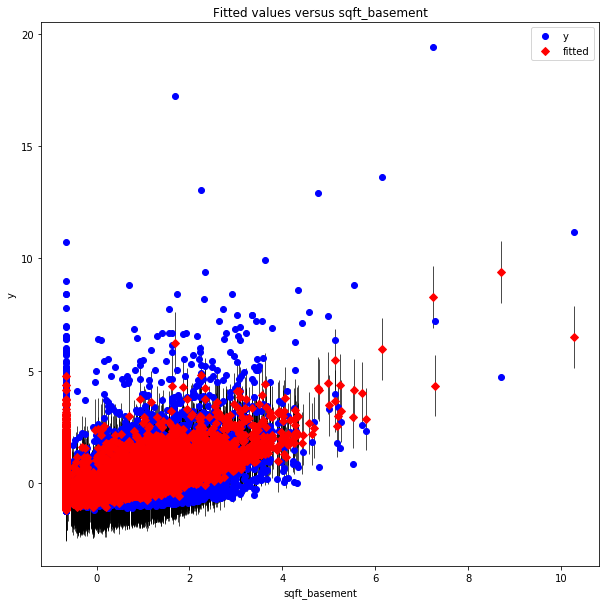

In [271]:
fig, ax = plt.subplots(figsize=(10,10))
fig = sm.graphics.plot_fit(results_standardised_all, 'sqft_basement', ax=ax)
#this looks clearly overfit

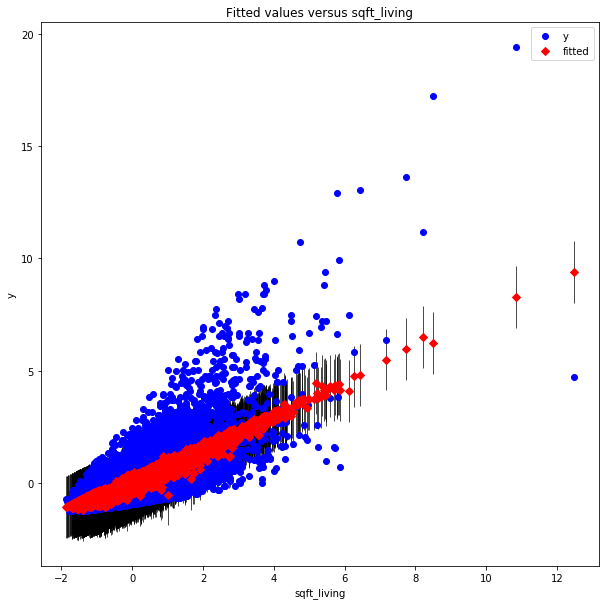

In [272]:
fig, ax = plt.subplots(figsize=(10,10))
fig = sm.graphics.plot_fit(results_standardised_all, 'sqft_living', ax=ax)

In [273]:
#so what's causing the heteroskedasticity in the sqft living data. If we can reduce this factor we may be able to fit 
# some test data??

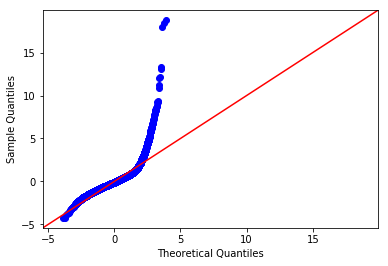

In [274]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [275]:
#haha

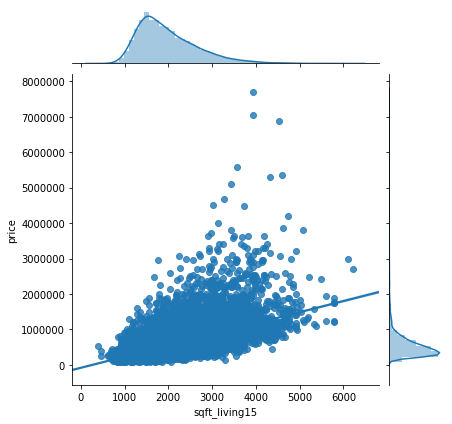

In [276]:
#Reviewing our sqft_living histogram and joint plot might help us.
sns.jointplot('sqft_living15', 'price', data=df, kind='reg');

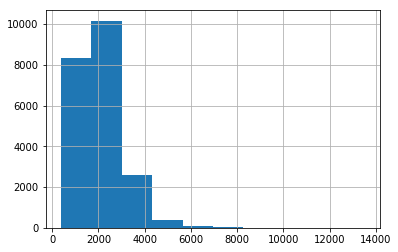

In [277]:
df['sqft_living'].hist()

In [278]:
df['sqft_living'].min()

370